In [533]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# import tensorflow as tf

# from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier


In [535]:
# Hämtar datasettet
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
#print(mnist.DESCR) # Visar info om databasen

In [536]:
# Delar upp datasettet i X och y
X = mnist["data"]
y = mnist["target"].astype(np.uint8)
print(X.shape) # Kollar storleken på datasettet

# Delar upp datan i träning/validering/test-data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=40)

# Här har jag definierat manuellt hur många samples som ska ingå i setten för att göra olika tester av olika modeller och jämförelser
# X_train = X[:50000]
# y_train = y[:50000]
# X_val = X[50000:60000]
# y_val = y[50000:60000]
# X_test = X[60000:70000]
# y_test = y[60000:70000]

(70000, 784)


In [539]:
print("NaN i täning/valideringsdata:", np.isnan(X_train_val).any(), "\nNaN i testdata:", np.isnan(X_test).any())



NaN i täning/valideringsdata: False 
NaN i testdata: False


(50575, 784)
(50575,)
Sanna värdet på första grafen: 3


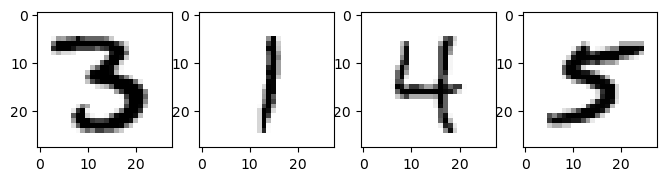

In [547]:
# Skriver ut storleken på träningsvariablerna
print(X_train.shape)
print(y_train.shape)

# Skriver ut sanna värdet av första grafen
print("Sanna värdet på första grafen:", y[nummer])

# Plottar exempel, första genom variabeln nummer, de tre andra är slumpmässiga
nummer = int(12)
fig, axes = plt.subplots(1, 4, figsize=(8, 4))
axes[0].imshow(X[nummer].reshape(28, 28), cmap=plt.get_cmap("binary"))
axes[1].imshow(X[random.randint(0, 50000)].reshape(28, 28), cmap=plt.get_cmap("binary"))
axes[2].imshow(X[random.randint(0, 50000)].reshape(28, 28), cmap=plt.get_cmap("binary"))
axes[3].imshow(X[random.randint(0, 50000)].reshape(28, 28), cmap=plt.get_cmap("binary"))
# axes[2].imshow(omtolkat_4.reshape(28, 28), cmap=plt.get_cmap("binary"))

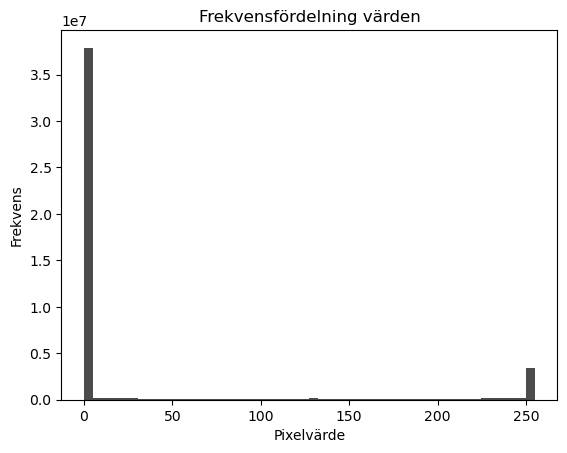

In [581]:
plt.hist(X_train_val.flatten(), bins=50, color='black', alpha=0.7)  # Histogram med 50 bins
plt.xlabel("Pixelvärde")
plt.ylabel("Frekvens")
plt.title("Frekvensfördelning värden")
plt.show()

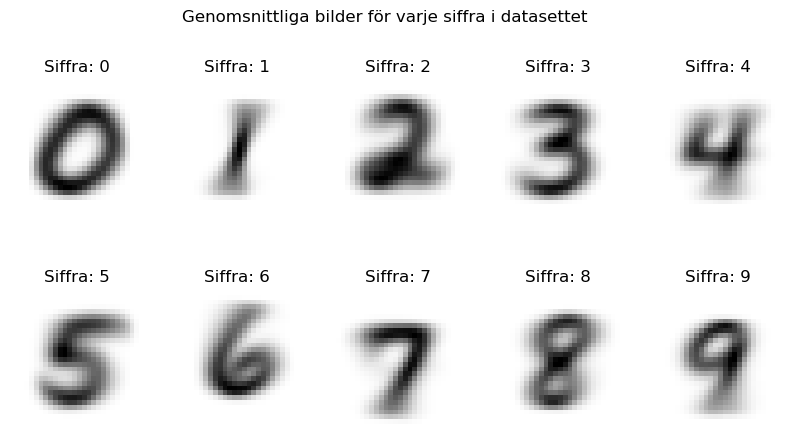

In [601]:
# Räknar ut och plottar genomsnittliga bilder för varje siffra i datasettet
siffra = 10  # Antal siffror (0–9)
medel_siffra = []

for i in range(siffra):
    mask = y_train_val == i  # Hitta alla bilder med siffran i
    medel_bild = X_train_val[mask].mean(axis=0)  # Beräkna medelbilden
    medel_bild = medel_bild.reshape(28, 28)  # MNIST-bilder är 28x28
    medel_siffra.append(medel_bild)

# Plotta alla medelvärdesbilder
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(medel_siffra[i], cmap="binary")
    ax.set_title(f"Siffra: {i}")
    ax.axis("off")

plt.suptitle("Genomsnittliga bilder för varje siffra i datasettet")
plt.show()

In [603]:
# Förbereder data

# Skalar datan till SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 
X_train_val_scaled = scaler.transform(X_train_val)

# Plattar till data 
X_train_flat = X_train.reshape(len(X_train), -1)
X_val_flat = X_val.reshape(len(X_val), -1)
X_test_flat = X_test.reshape(len(X_test), -1)
X_train_val_flat = X_train_val.reshape(len(X_train_val), -1)

# Normaliserar för Neuralt nätverk, används inte här
# X_train_ann = X_train / 255.0
# X_val_ann = X_val / 255.0
# X_test_ann = X_test / 255.0

In [615]:
# Tränar random forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=40) # 500 vald vid felsökning
rf_model.fit(X_train_flat, y_train)  # Tränar random forest

# Prediktar och utvärderar
rf_pred = rf_model.predict(X_val_flat)
rf_proba = rf_model.predict_proba(X_val_flat)
rf_acc = accuracy_score(y_val, rf_pred)
print(f'Random Forest Accuracy: {rf_acc * 100:.2f}%')

Random Forest Accuracy: 97.21%


In [607]:
# Tränar SVM
svm_model = svm.SVC(kernel='rbf', C=10)
svm_model.fit(X_train_scaled, y_train)

# Prediktar och utvärderar SVM
svm_pred = svm_model.predict(X_val_scaled)
svm_acc = accuracy_score(y_val, svm_pred)
print(f'SVM Accuracy: {svm_acc * 100:.2f}%')

SVM Accuracy: 97.40%


In [609]:
# Bygg och träna ett enkelt neuralt nätverk, kan inte användas här
# ann_model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

# ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ann_model.fit(X_train_ann, y_train, epochs=5, validation_split=0.1)

# Det neurala nätverket, används inte här
# ann_loss, ann_acc = ann_model.evaluate(X_val_ann, y_test)
# print(f'ANN Accuracy: {ann_acc * 100:.2f}%')

In [611]:
# Felsökning till när random forest gav en felaktig accuracy

# Testar om arrayen för random forest innehåller värden och om de har nan-värden
print(X_train_flat.shape, X_val_flat.shape)
print("nästa")
print(np.isnan(X_train_flat).sum(), np.isnan(X_val_flat).sum())

# Testar om labels är heltal
print(y_train.dtype, y_val.dtype, y_test.dtype)

(50575, 784) (8925, 784)
nästa
0 0
uint8 uint8 uint8


In [671]:
# Test av XGBoost när neurala nätverket inte funkade
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=300, eval_metric='mlogloss')
xgb_model.fit(X_train_flat, y_train)
xgb_pred = xgb_model.predict(X_val_flat)
xgb_acc = accuracy_score(y_val, xgb_pred)
print(f'XGBoost Accuracy: {xgb_acc * 100:.2f}%')


XGBoost Accuracy: 97.96%


In [617]:
# Skriver ut vilken modell som var bäst och la den i en final_model, detta spelar ingen roll framöver 
# eftersom jag fortsatte med bästa modellen manuellt till slut

if svm_acc > rf_acc:
    if svm_acc > xgb_acc:
        print("Bästa model: Support vector machines")
        # final_model = svm_model
    else:
        print("Bästa model: XGBoost")
        # final_model = xgb_model
 
else:
    if rf_acc > xgb_acc:        
        print("Bästa modell: Random forest")
        # final_model = rf_model
    else:
        print("Bästa modell: XGBoost")
        # final_model = xgb_model

Bästa model: XGBoost


### Gör en GridSearch för XGBoost

In [157]:
# Tar 1000 samples för GridSearch
X_train_grid = X_train_flat[:10000]
y_train_grid = y_train[:10000]

In [159]:
# Definiera hyperparametrar för XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Antal träd
    'max_depth': [3, 5, 7],           # Maxdjup för träd
    'learning_rate': [0.01, 0.1, 0.2], # Inlärningshastighet
    'subsample': [0.8, 1.0],          # Andel av träningen som används per träd
    'colsample_bytree': [0.8, 1.0]    # Andel av features som används per träd
}

# Skapa GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-faldig korsvalidering
    n_jobs=-1,  # Använd alla processorkärnor
    verbose=1  # Visa status
)

# Träna GridSearchCV
grid_search.fit(X_train_grid, y_train_grid)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [160]:
# Skriv ut bästa parametrarna och bästa modellen
print("Bästa parametrar:", grid_search.best_params_)
print("Bästa accuracy:", grid_search.best_score_)
# Resultatet:
# Bästa parametrar: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Bästa parametrar: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Bästa accuracy: 0.9545


In [619]:
print(X_train_val_flat.shape)
print(y_train_val.shape)
print(X_test_flat.shape)
print(y_test.shape)

(59500, 784)
(59500,)
(10500, 784)
(10500,)


In [623]:
# Tränar om XGBoost med parametrar från GridSearch och med träning och valideringsdata.
# xgb_model2 = XGBClassifier(
#     n_estimators=grid_search.best_params_["n_estimators"],
#     learning_rate=grid_search.best_params_["learning_rate"],
#     max_depth=grid_search.best_params_["max_depth"],
#     colsample_bytree=grid_search.best_params_["colsample_bytree"],
#     subsample=grid_search.best_params_["subsample"],
#     # use_label_encoder=False, 
#     eval_metric='mlogloss'
# )

# Lägger in bästa parametrarna nedan för att slippa köra om GridSearch
# Bästa parametrar: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
xgb_model2 = XGBClassifier(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=5,
    colsample_bytree=0.8,
    subsample=0.8,
    eval_metric='mlogloss'
)
xgb_model2.fit(X_train_val_flat, y_train_val)
xgb_pred2 = xgb_model2.predict(X_test_flat)
xgb_proba2 = xgb_model2.predict_proba(X_val_flat) # proba på val för att övriga modeller bara körts på val, inför ensamble
xgb_acc2 = accuracy_score(y_test, xgb_pred2)
print(f'XGBoost Accuracy: {xgb_acc2 * 100:.2f}%')

XGBoost Accuracy: 97.86%


In [669]:
# Testar träna på träningsdata och testa på validering med GridSearch som jämförelse
xgb_model5 = XGBClassifier(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=5,
    colsample_bytree=0.8,
    subsample=0.8,
    eval_metric='mlogloss'
)
xgb_model5.fit(X_train_flat, y_train)
xgb_pred5 = xgb_model5.predict(X_val_flat)
xgb_proba5 = xgb_model5.predict_proba(X_val_flat) # proba på val för att övriga modeller bara körts på val, inför ensamble
xgb_acc5 = accuracy_score(y_val, xgb_pred5)
print(f'XGBoost Accuracy: {xgb_acc5 * 100:.2f}%')

XGBoost Accuracy: 97.89%


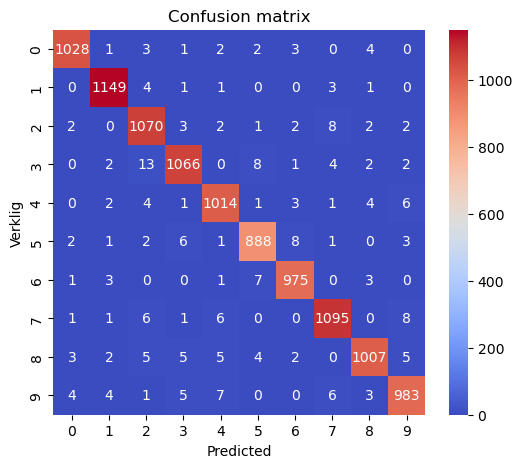

In [625]:
import seaborn as sns
cm = confusion_matrix(y_test, xgb_pred2)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "coolwarm", xticklabels = range(10), yticklabels = range (10))
plt.xlabel("Predicted")
plt.ylabel("Verklig")
plt.title("Confusion matrix")
plt.show()

In [627]:
# Sparar modellerna:
import joblib

# save
joblib.dump(svm_model, "ml_mnist_svm.pkl") 

# load
# svm_model2 = joblib.load("ml_mnist_svm.pk1")
# svm_model2.predict(X[0:1])

joblib.dump(rf_model, "ml_mnist_rf.pkl") 

# load
# rf_model2 = joblib.load("ml_mnist_rf.pk1")
# rf_model2.predict(X[0:1])

joblib.dump(xgb_model2, "ml_mnist_xgb.pkl") 

# load
# xgb_model2 = joblib.load("ml_mnist_xgb.pk1")
# xgb_model2.predict(X[0:1])

['ml_mnist_xgb.pkl']

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 189 190   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 143
  247 153   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 136 247 242  86   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  192 252 187   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  62 185  18   0   0   0   0 

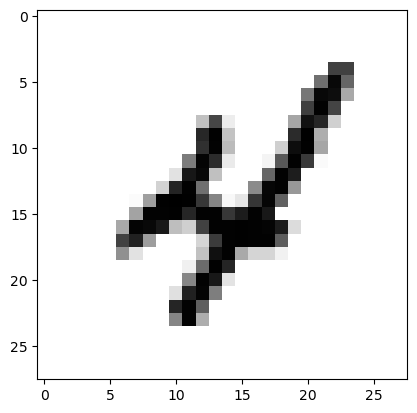

In [643]:
# Testar om prediktionen funkar på en slumpmässig bild
from PIL import Image, ImageOps
import xgboost as xgb

xgb_model3 = joblib.load("ml_mnist_xgb.pkl")

test_img = X[9]
testar_flat = test_img.reshape(-1,len(test_img))

# Skriver ut datan för bilden och shape
print(testar_flat)
print(testar_flat.shape)

# Plottar bilden
plt.imshow(test_img.reshape(28, 28), cmap=plt.get_cmap("binary"))

# Gör en prediktion med den importerade modellen och skriver ut den
print("Testprediktion:", xgb_model3.predict(testar_flat))

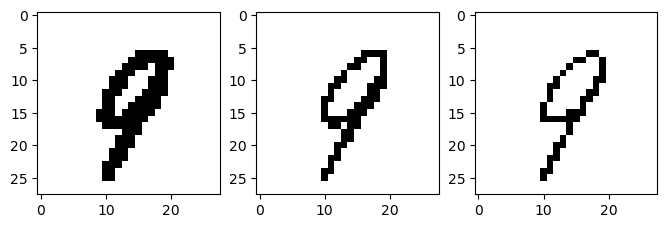

In [645]:
# Testar att tolka om bilderna för att se hur varianter av modellen presterar
omtolkat = X[22]
omtolkat_2 = np.where(omtolkat > 10, 255, 0)
omtolkat_3 = np.where(omtolkat > 128, 255, 0)
omtolkat_4 = np.where(omtolkat > 200, 255, 0)

# Printar ut resultatet av den omtolkade siffran
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
axes[0].imshow(omtolkat_2.reshape(28, 28), cmap=plt.get_cmap("binary"))
axes[1].imshow(omtolkat_3.reshape(28, 28), cmap=plt.get_cmap("binary"))
axes[2].imshow(omtolkat_4.reshape(28, 28), cmap=plt.get_cmap("binary"))
# plt.imshow(omtolkat_2.reshape(28, 28), cmap=plt.get_cmap("binary"))

In [649]:
# Gör om alla värden som är över 10 till 255 för att "förtjocka" siffran. 
X_train_flat_10 = np.where(X_train_flat > 10, 255, 0)
X_val_flat_10 = np.where(X_val_flat > 10, 255, 0)

xgb_model_10 = XGBClassifier(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=5,
    colsample_bytree=0.8,
    subsample=0.8,
    eval_metric='mlogloss'
)
xgb_model_10.fit(X_train_flat_10, y_train)
xgb_pred_10 = xgb_model_10.predict(X_val_flat_10)
xgb_acc_10 = accuracy_score(y_val, xgb_pred_10)
print(f'XGBoost Accuracy: {xgb_acc_10 * 100:.2f}%')


XGBoost Accuracy: 97.96%


In [650]:
# Gör om alla värden som är över 128 till 255 för att strukturera om siffran, tränar om och testar modellen på validering. 
X_train_flat_128 = np.where(X_train_flat > 128, 255, 0)
X_val_flat_128 = np.where(X_val_flat > 128, 255, 0)

xgb_model_128 = XGBClassifier(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=5,
    colsample_bytree=0.8,
    subsample=0.8,
    eval_metric='mlogloss'
)
xgb_model_128.fit(X_train_flat_128, y_train)
xgb_pred_128 = xgb_model_128.predict(X_val_flat_128)
xgb_acc_128 = accuracy_score(y_val, xgb_pred_128)
print(f'XGBoost Accuracy: {xgb_acc_128 * 100:.2f}%')

XGBoost Accuracy: 97.70%


In [652]:
# Gör om alla värden som är över 200 till 255 för att "förtunna" siffran, tränar om och testar modellen på validering
X_train_flat_200 = np.where(X_train_flat > 200, 255, 0)
X_val_flat_200 = np.where(X_val_flat > 200, 255, 0)

xgb_model_200 = XGBClassifier(
    n_estimators=grid_search.best_params_["n_estimators"],
    learning_rate=grid_search.best_params_["learning_rate"],
    max_depth=grid_search.best_params_["max_depth"],
    colsample_bytree=grid_search.best_params_["colsample_bytree"],
    subsample=grid_search.best_params_["subsample"],
    eval_metric='mlogloss'
)
xgb_model_200.fit(X_train_flat_200, y_train)
xgb_pred_200 = xgb_model_200.predict(X_val_flat_200)
xgb_acc_200 = accuracy_score(y_val, xgb_pred_200)
print(f'XGBoost Accuracy: {xgb_acc_200 * 100:.2f}%')

XGBoost Accuracy: 96.74%


In [654]:
# Gör om alla värden som är över 254 till 255 för att "förtunn" siffran kraftigt, tränar om och testar modellen på validering
X_train_flat_254 = np.where(X_train_flat > 254, 255, 0)
X_val_flat_254 = np.where(X_val_flat > 254, 255, 0)

xgb_model_254 = XGBClassifier(
    n_estimators=grid_search.best_params_["n_estimators"],
    learning_rate=grid_search.best_params_["learning_rate"],
    max_depth=grid_search.best_params_["max_depth"],
    colsample_bytree=grid_search.best_params_["colsample_bytree"],
    subsample=grid_search.best_params_["subsample"],
    eval_metric='mlogloss'
)
xgb_model_254.fit(X_train_flat_254, y_train)
xgb_pred_254 = xgb_model_254.predict(X_val_flat_254)
xgb_acc_254 = accuracy_score(y_val, xgb_pred_254)
print(f'XGBoost Accuracy: {xgb_acc_254 * 100:.2f}%')

XGBoost Accuracy: 40.71%


In [663]:
# Tränar om den bästa av modellerna med omgjorda siffror och testar på testdata
X_train_val_flat_10 = np.where(X_train_val_flat > 10, 255, 0)
X_test_flat_10 = np.where(X_test_flat > 10, 255, 0)

xgb_model_10 = XGBClassifier(
    n_estimators=grid_search.best_params_["n_estimators"],
    learning_rate=grid_search.best_params_["learning_rate"],
    max_depth=grid_search.best_params_["max_depth"],
    colsample_bytree=grid_search.best_params_["colsample_bytree"],
    subsample=grid_search.best_params_["subsample"],
    eval_metric='mlogloss'
)
xgb_model_10.fit(X_train_val_flat_10, y_train_val)
xgb_pred_10 = xgb_model_10.predict(X_test_flat_10)
xgb_acc_10 = accuracy_score(y_test, xgb_pred_10)
print(f'XGboost med omgjord data, Accuracy: {xgb_acc_10 * 100:.2f}%, jämfört med XGBoost utan omgjord data: {xgb_acc2 * 100:.2f}%')

XGboost med omgjord data, Accuracy: 97.91%, jämfört med XGBoost utan omgjord data: 97.86%


In [673]:
# Testar att träna om modellen med "förtjockade" siffror
xgb_model_10_2 = XGBClassifier(n_estimators=300, eval_metric='mlogloss')
xgb_model_10_2.fit(X_train_val_flat_10, y_train_val)
xgb_pred_10_2 = xgb_model_10_2.predict(X_test_flat_10)
xgb_acc_10_2 = accuracy_score(y_test, xgb_pred_10_2)
print(f'XGBoost Accuracy: {xgb_acc_10_2 * 100:.2f}%')

XGBoost Accuracy: 98.07%


In [665]:
# Testar skapa en ensamble med XGBoost och Random forest. Utan den senaste omgjorda datan
from sklearn.ensemble import VotingClassifier
# Skapar en vote
voting_clf = VotingClassifier(
    estimators=[('Vinnande XGB', xgb_model2), ('Random forest', rf_model)],
    voting='soft'  # För att kunna använda soft lade jag till predict på xgb_model2 på validering
)
voting_clf.fit(X_train_val_flat, y_train_val)
vote_pred = voting_clf.predict(X_test_flat)
vote_acc = accuracy_score(y_test, vote_pred)
print(f'Vote: {vote_acc * 100:.2f}%')

Vote: 97.76%


In [675]:
# Sparar några modeller för att använda i Streamlit-appen
joblib.dump(xgb_model_10_2, "ml_mnist_10_xgb.pkl")
joblib.dump(xgb_model_200, "ml_mnist_200_xgb.pkl") 
joblib.dump(voting_clf, "ml_mnist_vote.pk1")

['ml_mnist_vote.pk1']